In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 불필요한 경고 메시지를 나오지 않도록 한다.
import warnings
warnings.filterwarnings('ignore')

#seaborn에서 제공하는 라이브러리
#sns.set_style("ticks")
# sns.set_style("darkgrid")
#sns.set_style("whitegrid")

#그래프를 그리기 위한 기본 설정
#폰트 설정 - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'
# 폰트 설정 - 맥
# plt.rcParams['font.family'] = 'AppleGothic'

#그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6

#글자 크기
plt.rcParams['font.size'] = 14

#폰트 설정 시 - 기호 깨지는 것 방지하기
plt.rcParams['axes.unicode_minus'] = False

#plt.rcParams['figure.facecolor'] = 'white'
import missingno


### 맛집 데이터 불러오기

In [2]:
# 데이터를 읽어온다.
matzip = pd.read_csv('data2/matzipData.csv')
matzip

,Restaurant Name,Rating,Address,Tel,Food,Price,Parking,Operating Time,Holiday
0,이나니와요스케,4.4,서울시 중구 을지로1가 192-11,02-772-9994,라멘 / 소바 / 우동,만원-2만원,주차공간없음,11:00 - 23:00,일
1,바오차이,4.4,서울시 중구 을지로2가 203,02-6031-0107,정통 중식 / 일반 중식,2만원-3만원,유료주차 가능,11:30 - 21:30,NaN
2,라칸티나,4.4,서울시 중구 을지로1가 50,02-777-2579,이탈리안,3만원-4만원,NaN,월-토: 11:30 - 23:00 일: 17:30 - 23:00,NaN
3,라세느,4.3,서울시 중구 소공동 1,02-317-7171,뷔페,4만원 이상,발렛,06:00 - 22:00,NaN
4,산수갑산,4.3,서울시 중구 인현동1가 15-4,02-2275-6654,탕 / 찌개 / 전골,만원 미만,유료주차 가능,월-금: 11:30 - 22:00 토: 11:30 - 20:00,일
...,...,...,...,...,...,...,...,...,...
395,누룩나무,4,서울시 종로구 관훈동 118-19,02-722-3398,전통 주점 / 포차,만원-2만원,주차공간없음,17:00 - 01:30,일
396,옴,4,서울시 종로구 신문로1가 2,02-723-4848,인도 음식,만원-2만원,주차공간없음,11:00 - 22:00,NaN
397,코블러,4,서울시 종로구 내자동 157,02-733-6421,칵테일 / 와인,만원-2만원,유료주차 가능,19:00 - 03:00,일
398,클류치,4,서울시 종로구 명륜3가 79-1,010-2702-1496,카페 / 디저트,만원 미만,주차공간없음,월-토: 10:00 - 23:00 일: 11:00 - 20:00,NaN


### 맛집 데이터 처리

In [3]:
# 결측치 확인
matzip.isna().sum()

Restaurant Name      0
Rating               0
Address              0
Tel                 50
Food                 0
Price                3
Parking             71
Operating Time      36
Holiday            274
dtype: int64

### 결측치 처리
#### 휴일에 대한 결측치 처리

In [4]:
# 휴일 구조 파악
matzip['Holiday'].value_counts()

일                     75
월                     21
토, 일                   7
화                      3
일, 월                   2
수                      2
일, 첫째 월                2
둘째/넷째 일                2
월, 화                   2
둘째, 넷째 일               1
첫째, 셋째 월, 둘째, 넷째 일     1
월, 일                   1
월, 마지막 화               1
넷째 일, 월                1
월, 셋째 화                1
격주 월                   1
첫째/셋째 일                1
토-일                    1
토                      1
Name: Holiday, dtype: int64

In [5]:
# 휴일의 결측치는 연중무휴로 채워준다.
matzip['Holiday'].fillna('연중무휴', inplace=True)
matzip.isna().sum()

Restaurant Name     0
Rating              0
Address             0
Tel                50
Food                0
Price               3
Parking            71
Operating Time     36
Holiday             0
dtype: int64

In [6]:
matzip['Holiday'].value_counts()

연중무휴                  274
일                      75
월                      21
토, 일                    7
화                       3
둘째/넷째 일                 2
일, 월                    2
수                       2
일, 첫째 월                 2
월, 화                    2
둘째, 넷째 일                1
첫째, 셋째 월, 둘째, 넷째 일      1
월, 일                    1
월, 마지막 화                1
넷째 일, 월                 1
월, 셋째 화                 1
격주 월                    1
첫째/셋째 일                 1
토-일                     1
토                       1
Name: Holiday, dtype: int64

#### 가격에 대한 결측치 처리와 변환



In [8]:
# 가격 데이터 확인
matzip['Price'].value_counts()

만원-2만원     161
만원 미만      159
2만원-3만원     46
4만원 이상      22
3만원-4만원      9
Name: Price, dtype: int64

In [9]:
# 결측치 확인
matzip['Price'].isna().sum()

3

In [10]:
#  결측치는 10000으로 채워준다.
# 채운 이유 : 그냥...
# 앞으로 가격을 숫자 값으로 변환 할 것이다.
## 가장 작은 값을 10000으로 할 것이기 때문에
## 10000으로 설정한다.
matzip['Price'].fillna('10000', inplace=True)
matzip['Price'].isna().sum()

0

In [11]:
matzip['Price'].value_counts()

만원-2만원     161
만원 미만      159
2만원-3만원     46
4만원 이상      22
3만원-4만원      9
10000        3
Name: Price, dtype: int64

In [25]:
# 값을 변경한다.
# 만원이라는 글자를 10000으로 변경한다.
matzip['Price'] = matzip['Price'].str.replace('만원', '10000')
# 210000을 20000으로 바꾼다.
matzip['Price'] = matzip['Price'].str.replace('210000', '20000')
# 310000을 30000으로 바꾼다.
matzip['Price'] = matzip['Price'].str.replace('310000', '30000')
# 410000을 40000으로 바꾼다.
matzip['Price'] = matzip['Price'].str.replace('410000', '40000')
# 10000- 를 길이가 0인 문자열로 바꾼다.
matzip['Price'] = matzip['Price'].str.replace('10000-', '')
matzip['Price'] = matzip['Price'].str.replace('20000-', '')
matzip['Price'] = matzip['Price'].str.replace('30000-', '')
# 미만, 이상을 길이가 0인 문자열로 바꾼다.
matzip['Price'] = matzip['Price'].str.replace('미만', '')
matzip['Price'] = matzip['Price'].str.replace('이상', '')
# 공백 제거
matzip['Price'] = matzip['Price'].str.strip()


matzip['Price'].value_counts()

10000    162
20000    161
30000     46
40000     31
Name: Price, dtype: int64

In [29]:
# 변경 후 값의 타입을 확인한다.
matzip['Price'].dtype

dtype('int64')

In [30]:
matzip['Price'] = matzip['Price'].astype('int64')
matzip['Price'].dtype

dtype('int64')

- 평점

In [31]:
# 평점에 저장되어 있는 데이터 확인
matzip['Rating'].value_counts()

-      155
4       53
4.1     47
4.2     40
4.3     37
4.4     20
4.5      9
3.9      7
3.7      6
4.6      5
3.3      5
3.6      4
3.4      4
4.7      3
3.8      2
3.2      1
3.1      1
2.7      1
Name: Rating, dtype: int64

In [32]:
# 결측치 확인
matzip['Rating'].isna().sum()

0

In [33]:
# - 만 0.0으로 바꾸고 실수로 변환.
# - 를 0.0으로 변경한다.
matzip['Rating'] = matzip['Rating'].str.replace('-','0.0')
matzip['Rating'].value_counts()

0.0    155
4       53
4.1     47
4.2     40
4.3     37
4.4     20
4.5      9
3.9      7
3.7      6
4.6      5
3.3      5
3.6      4
3.4      4
4.7      3
3.8      2
3.2      1
3.1      1
2.7      1
Name: Rating, dtype: int64

In [34]:
# 값의 타입을 확인한다.
matzip['Rating'].dtype

dtype('O')

In [39]:
#실수로 변환한다.
matzip['Rating'] = matzip['Rating'].astype('float64')
matzip['Rating'].dtype

dtype('float64')

#### 전화번호

In [41]:
# 결측치 확인
matzip['Tel'].isna().sum()

50

In [42]:
# 전화번호 결측치를 번호 없음으로 채워준다.
matzip['Tel'].fillna('번호없음', inplace=True)
matzip['Tel'].isna().sum()

0

#### 주차공간

In [43]:
matzip['Parking'].isna().sum()

71

In [44]:
#주차공간에 저장되어 있는 값들을 확인한다.
matzip['Parking'].value_counts()

주차공간없음                199
유료주차 가능                89
무료주차 가능                24
발렛                      8
유료주차 가능 2시간 무료          3
무료주차 가능 2시간 무료          2
유료주차 가능 주차권 2시간 제공      1
무료주차 가능 당일 무료           1
유료주차 가능 1시간 무료          1
유료주차 가능 1.5시간 무료        1
Name: Parking, dtype: int64

In [45]:
# 결측치를 주차공간없음으로 채워준다.
matzip['Parking'].fillna('주차공간없음',inplace=True)
matzip['Parking'].isna().sum()

0

In [46]:
matzip['Parking'].value_counts()

주차공간없음                270
유료주차 가능                89
무료주차 가능                24
발렛                      8
유료주차 가능 2시간 무료          3
무료주차 가능 2시간 무료          2
유료주차 가능 주차권 2시간 제공      1
무료주차 가능 당일 무료           1
유료주차 가능 1시간 무료          1
유료주차 가능 1.5시간 무료        1
Name: Parking, dtype: int64

####  영업 시간

In [47]:
matzip['Operating Time'].isna().sum()

36

In [48]:
matzip['Operating Time'].value_counts()

11:00 - 22:00                            25
11:30 - 22:00                            15
11:30 - 21:30                            15
00:00 - 24:00                            12
11:00 - 23:00                            11
                                         ..
월-목: 18:00 - 24:00 금-토: 18:00 - 02:00     1
10:00 - 01:00                             1
월-토: 11:00 - 03:00 일: 11:00 - 23:00       1
16:00 - 06:00                             1
월-금: 10:30 - 21:00 토-일: 10:30 - 22:00     1
Name: Operating Time, Length: 204, dtype: int64

In [49]:
# : vs ： 특수문자기호가 다를 수 있음. 복사해서 사용할것.
# 결측치를 00:00 - 24:00로 채워준다.
matzip['Operating Time'].fillna('00:00 - 24:00',inplace=True)
matzip['Operating Time'].isna().sum()


0

In [52]:
matzip.isna().sum()

Restaurant Name    0
Rating             0
Address            0
Tel                0
Food               0
Price              0
Parking            0
Operating Time     0
Holiday            0
dtype: int64

### 데이터 분석

### 가격 분포 확인

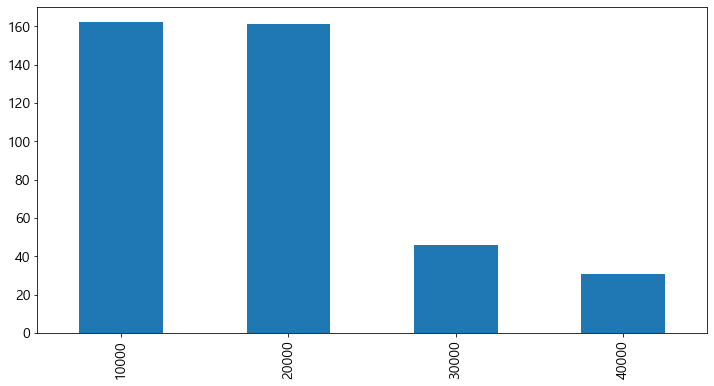

In [55]:
# 막대그래프
# 컬럼의 값의 종류가 적을경우(카테고리형 데이터)
# 컬럼에 저장되어 있는 값 종류별 양을 비교할 때
a1 = matzip['Price'].value_counts()

a1.plot.bar()
plt.show()

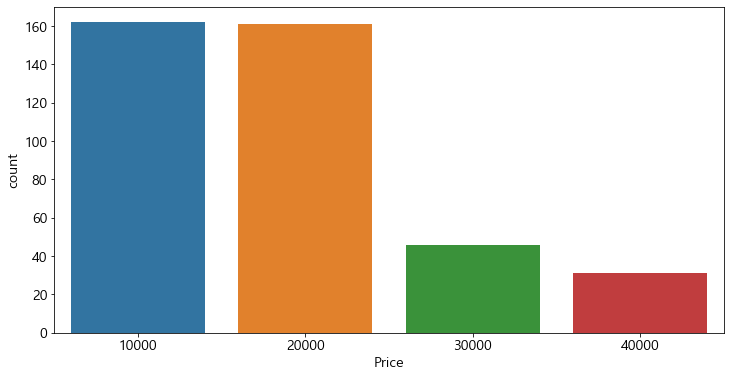

In [56]:
# x의 각각의 정보를 파악하는게 countplot
# 막대그래프는 컬럼 안의 값의 분포, 카테고리형 데이터에 사용.
sns.countplot(x='Price', data=matzip)
plt.show()

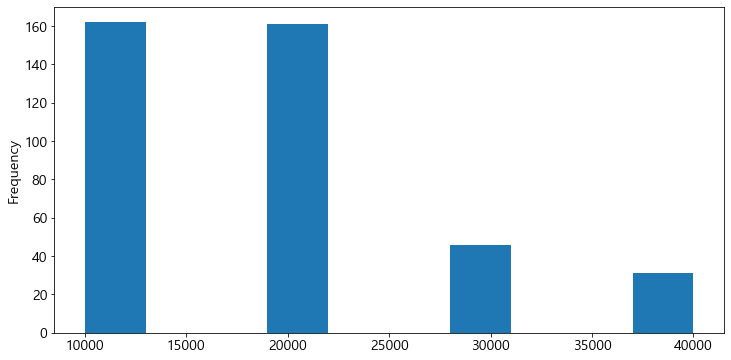

In [61]:
# 히스토그램
# 범위형 데이터의 분포를 보고자 할 때 사용한다.(혹은 선그래프)
# 최소와 최대 안에서 주어진 그룹의 개수만큼 범위를 분할하여
# 각 범위 안에 해당하는 데이터의 개수를 시각화한다.
# 분포, 왜도, 첨도, 밀도 등등 통계에서 많이 사용하는 그래프이다.
matzip['Price'].plot.hist()
# 기본 (bins=10)
plt.show()

10000, 20000원 대가 많고 30000, 40000대는 적다.

### 주차 공간과 평점간의 관계

In [66]:
# 주차 공간의 분포를 확인한다.
# 히스토그램은 숫자데이터만 가지고 있는 최대 최소를 가지고 있는 범위형 데이터에만 활용 가능.
# 문자열이 섞여있으면 안됨.
# 문자열 데이터를 가지고 범위를 잡아 그룹을 나누는 것 자체가 말이 되지 않기 떄문에
# 오류가 발생한다.
# 막대그래프로 그리는게 좋다.
matzip['Parking'].plot.hist()
plt.show()

TypeError: no numeric data to plot

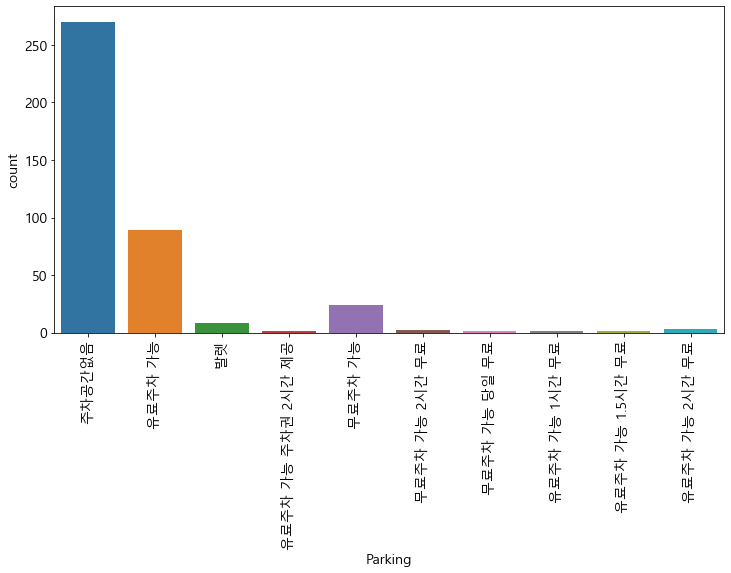

In [68]:
# x축 라벨을 회전시킨다.
plt.xticks(rotation=90)
# 막대그래프로 확인한다.
sns.countplot(x='Parking', data=matzip)

# Series로 그리는 것
# a1 = matzip['Parking'].value_counts()
# a1.plot.bar()



plt.show()

In [70]:
# Parking에 저장되어 있는 값의 목록을 출력한다.
matzip['Parking']

0       주차공간없음
1      유료주차 가능
2       주차공간없음
3           발렛
4      유료주차 가능
        ...   
395     주차공간없음
396     주차공간없음
397    유료주차 가능
398     주차공간없음
399    유료주차 가능
Name: Parking, Length: 400, dtype: object

In [71]:
matzip['Parking'].value_counts()

주차공간없음                270
유료주차 가능                89
무료주차 가능                24
발렛                      8
유료주차 가능 2시간 무료          3
무료주차 가능 2시간 무료          2
유료주차 가능 주차권 2시간 제공      1
무료주차 가능 당일 무료           1
유료주차 가능 1시간 무료          1
유료주차 가능 1.5시간 무료        1
Name: Parking, dtype: int64

In [75]:
# 인덱스 값 종류 확인, 주차공간 상태.
a1 = matzip['Parking'].value_counts().index
a1

Index(['주차공간없음', '유료주차 가능', '무료주차 가능', '발렛', '유료주차 가능 2시간 무료',
       '무료주차 가능 2시간 무료', '유료주차 가능 주차권 2시간 제공', '무료주차 가능 당일 무료',
       '유료주차 가능 1시간 무료', '유료주차 가능 1.5시간 무료'],
      dtype='object')

In [77]:
# 평점이 0.0인 것은 제외한다.
idx2 = matzip.query('Rating ==0.0').index
matzip_temp = matzip.drop(idx2)
matzip_temp

,Restaurant Name,Rating,Address,Tel,Food,Price,Parking,Operating Time,Holiday
0,이나니와요스케,4.4,서울시 중구 을지로1가 192-11,02-772-9994,라멘 / 소바 / 우동,20000,주차공간없음,11:00 - 23:00,일
1,바오차이,4.4,서울시 중구 을지로2가 203,02-6031-0107,정통 중식 / 일반 중식,30000,유료주차 가능,11:30 - 21:30,연중무휴
2,라칸티나,4.4,서울시 중구 을지로1가 50,02-777-2579,이탈리안,40000,주차공간없음,월-토: 11:30 - 23:00 일: 17:30 - 23:00,연중무휴
3,라세느,4.3,서울시 중구 소공동 1,02-317-7171,뷔페,40000,발렛,06:00 - 22:00,연중무휴
4,산수갑산,4.3,서울시 중구 인현동1가 15-4,02-2275-6654,탕 / 찌개 / 전골,10000,유료주차 가능,월-금: 11:30 - 22:00 토: 11:30 - 20:00,일
...,...,...,...,...,...,...,...,...,...
395,누룩나무,4.0,서울시 종로구 관훈동 118-19,02-722-3398,전통 주점 / 포차,20000,주차공간없음,17:00 - 01:30,일
396,옴,4.0,서울시 종로구 신문로1가 2,02-723-4848,인도 음식,20000,주차공간없음,11:00 - 22:00,연중무휴
397,코블러,4.0,서울시 종로구 내자동 157,02-733-6421,칵테일 / 와인,20000,유료주차 가능,19:00 - 03:00,일
398,클류치,4.0,서울시 종로구 명륜3가 79-1,010-2702-1496,카페 / 디저트,10000,주차공간없음,월-토: 10:00 - 23:00 일: 11:00 - 20:00,연중무휴


In [80]:
# Parking에 저장되어 있는 값 만큼 반복한다.
for value in a1:
#      print(value)
# 각 값에 해당하는 로우의 인덱스를 가져온다.
        idx = matzip_temp.query(f'Parking == "{value}"').index
        display(idx)

Int64Index([  0,   2,   6,   7,   8,   9,  10,  13,  14,  16,
            ...
            380, 381, 382, 384, 386, 388, 393, 395, 396, 398],
           dtype='int64', length=150)

Int64Index([  1,   4,   5,  12,  15,  17,  32,  34,  38,  39,  41,  44, 200,
            201, 203, 212, 215, 220, 224, 227, 233, 234, 241, 243, 247, 253,
            266, 272, 273, 274, 277, 281, 299, 302, 303, 305, 308, 312, 321,
            332, 335, 341, 343, 347, 348, 349, 350, 351, 356, 359, 361, 368,
            369, 383, 385, 389, 390, 391, 394, 397, 399],
           dtype='int64')

Int64Index([ 19, 209, 231, 246, 250, 251, 254, 258, 279, 286, 289, 290, 324,
            325, 363, 371, 373, 387, 392],
           dtype='int64')

Int64Index([3, 204, 278, 283, 309, 318, 357, 377], dtype='int64')

Int64Index([313, 334, 352], dtype='int64')

Int64Index([202], dtype='int64')

Int64Index([11], dtype='int64')

Int64Index([], dtype='int64')

Int64Index([219], dtype='int64')

Int64Index([223], dtype='int64')

주차공간없음 : 4.106000000000003


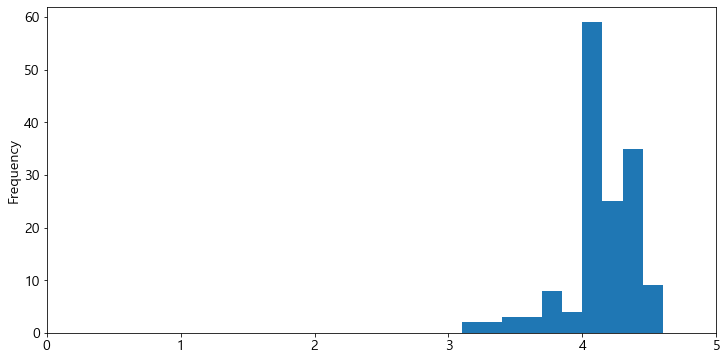

유료주차 가능 : 4.090163934426228


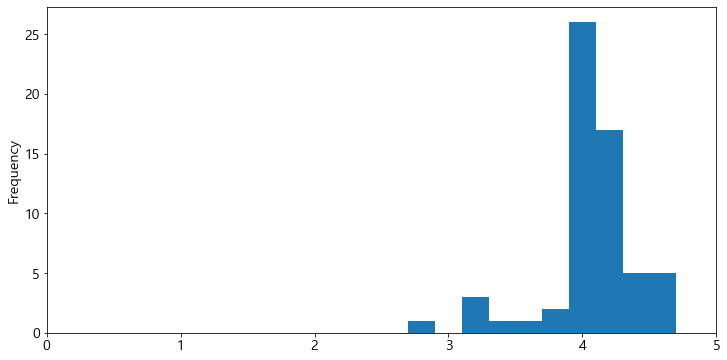

무료주차 가능 : 4.173684210526316


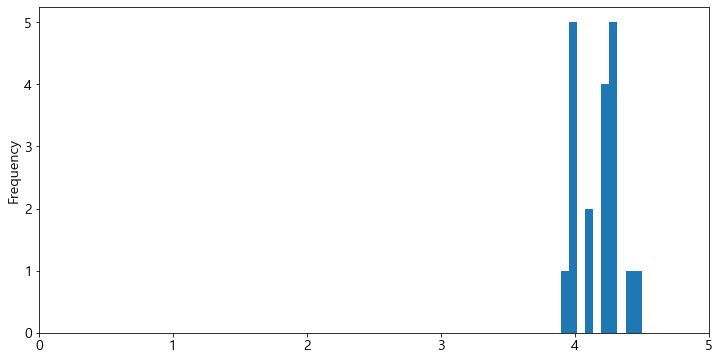

발렛 : 4.1875


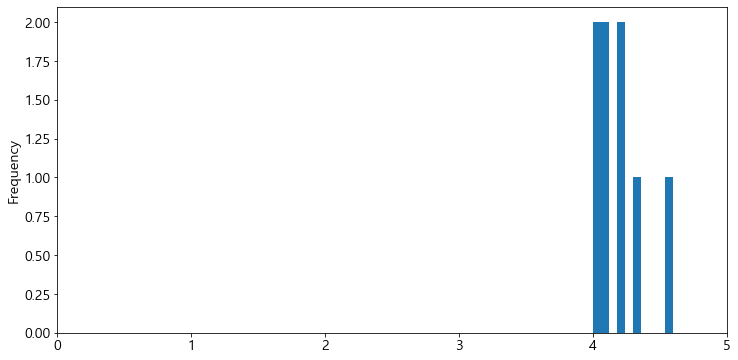

유료주차 가능 2시간 무료 : 4.066666666666666


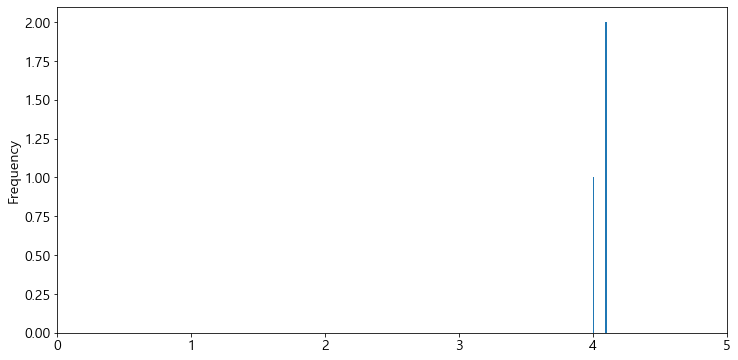

무료주차 가능 2시간 무료 : 4.7


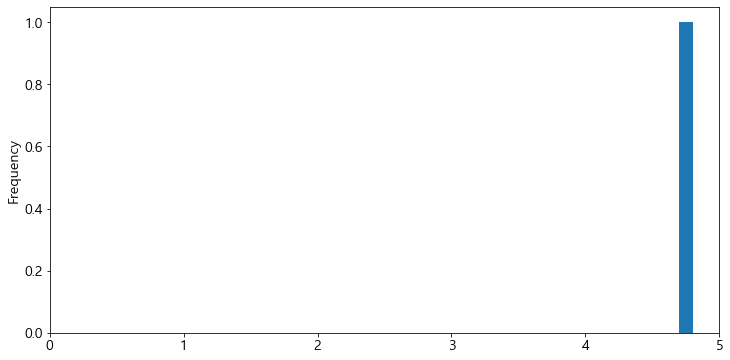

유료주차 가능 주차권 2시간 제공 : 4.1


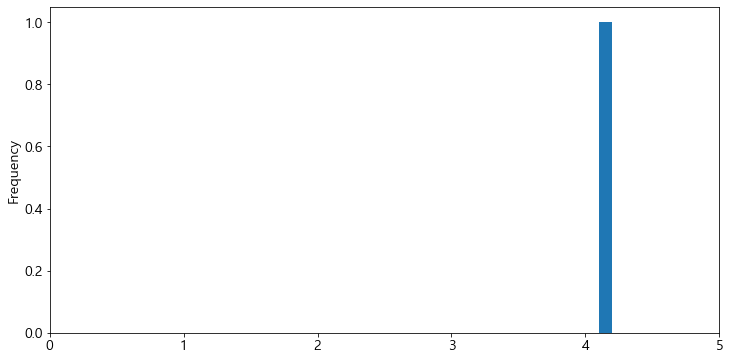

무료주차 가능 당일 무료 : nan


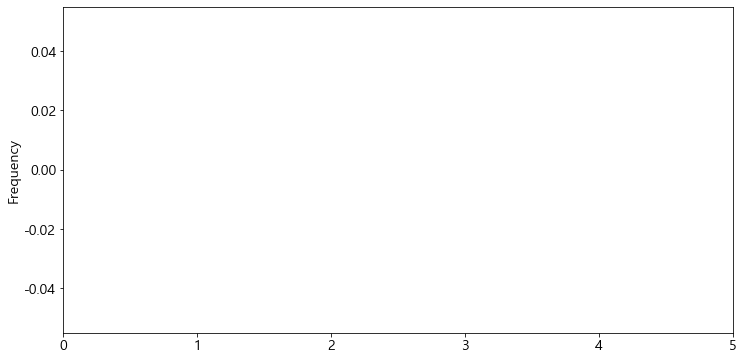

유료주차 가능 1시간 무료 : 4.4


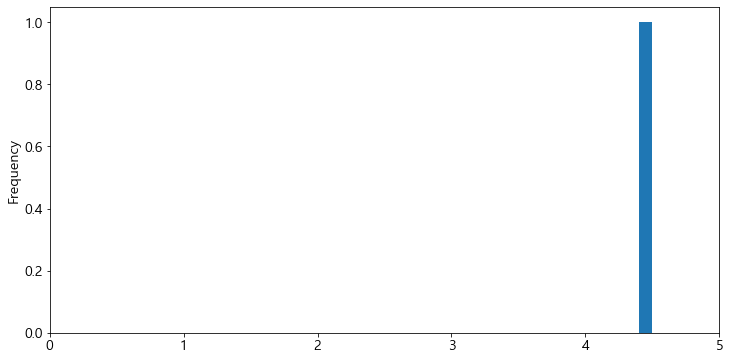

유료주차 가능 1.5시간 무료 : 4.4


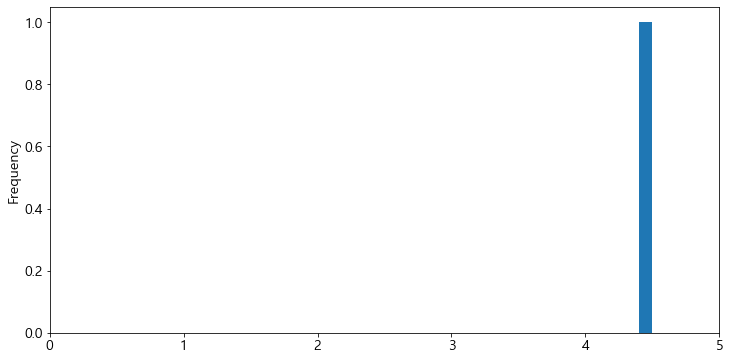

In [91]:
for value in a1:
#      print(value)
# 각 값에 해당하는 로우의 인덱스를 가져온다.
# @변수 이름도 가능
        idx = matzip_temp.query('Parking == @value').index
        #display(idx)
        
        #idx에 해당하는 데이터들 중 평점을 가져온다.
        rating = matzip_temp.loc[idx, 'Rating']
        #display(rating)
        
        #평점 평균을 구한다.
        rating_mean = rating.mean()
        print(f'{value} : {rating_mean}')
        
        #평점 분포를 확인한다.
        rating.plot.hist()
        plt.xlim(0, 5)
        plt.show()